# SBI CHEQUE VALIDATION USING DEEP NEURAL NETWROK

##                                                        TEAM
###                                           ANUBHAV, VIJENDRA, NEERAJ , ASHUTOSH

## HOW TO RUN:-

### to combine splited files in windows

cd into yolo-data
copy /b file1 + file2 + file3 + file4 filetogether.tar.gz
uncompress filetogether.tar.gz


### How to combine splited files in Ubuntu
cd into yolo-data
cat final-data.tar.gz* | tar xz


### How to  split  big files in Ubuntu
tar cvzf - final-data | split -b 10m - final-data.tar.gz


### darknet commands and YOLO for object detecction
yolo training on 3000 images and with 8000 iteration  

Currently training is still going  on GPU cluster in background mode, lets see after 1 day:-
/datadrive/NeerajAg/yolo/darknet

We tried pretrain darknet model to train further using below command:-
https://pjreddie.com/darknet/yolo/

train:-
./darknet detector train cfg/obj.data cfg/yolo.cfg darknet19_448.conv.23
nohup  ./darknet detector train cfg/obj.data cfg/yolo.cfg  backup/yolo.backup  > training.log &

Test:-
./darknet detector test cfg/obj.data  cfg/yolo.cfg backup/yolo-obj_final.weights /home/ashutosh/sentienceWork/darknet/final-data/final-image-0.jpg -thresh 0

See yolo training log 
Region Avg IOU: 0.481528, Class: 0.994299, Obj: 0.242427, No Obj: 0.004990, Avg Recall: 0.333333,  count: 3
7556: 9.163102, 6.318862 avg, 0.001000 rate, 0.095384 seconds, 7556 images
Loaded: 0.000055 seconds

6.318862 avg loss is too high as per yolo it should be below 0.06 to 0.6

./darknet detector train cfg/obj.data  cfg/yolo-obj.cfg yolo.weights

/home/ashutosh/sentienceWork/darknet/final-data/final-image-0.jpg


/darknet detector train cfg/obj.data cfg/yolo.cfg darknet19_448.conv.23

./darknet detector test cfg/obj.data  cfg/yolo.cfg backup/yolo-obj_final.weights /home/ashutosh/sentienceWork/darknet/final-data/final-image-0.jpg -thresh 0



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import random


## Upload sample images


***********GET & POST to SBI*******************************************


For Cheque Upload API Key is : 900c3022-f2fe-425c-9d47-4682652138c8   
For cheque Retreive API key is : 83eff580-e80e-415f-9234-f91da3aa97d2 


Team ID : 8174843327


In [ ]:



curl_str = "curl -X POST http://apiplatformcloudse-gseapicssbisecond-uqlpluu8.srv.ravcloud.com:8001/InsertChqDetails"
base_image_url = os.getcwd()
folder = "\\Combined\\"


details = pd.read_csv('details3.csv') #change this file to latest final-extracted-cheque.csv

details = details.drop(details.columns[[0,1]], axis=1)
print (details.shape[0])


from PIL import Image
with open('final-data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
   
    for row in spamreader:
        #only upload original cheque images
        
        try:
            im = Image.open(row[24])
            width, height = im.size
            #print(width, height)
            writer.writerow(row)
            break
            amount_digit = "-H " + "'amount_digit: %s'" %(details.loc[i][1])
            amount_words = "-H " + "'amount_words: %s'" %(details.loc[i][2])
            c_num = str(details.loc[i][3]) + "00"
            print (type(c_num))
            cheque_num = "-H " + "'chq_num: %s'" %(c_num)
            img_abs_path = details.loc[i][4]
            img_path = base_image_url + folder + img_abs_path
            data_str = "--data" + " " + img_path
            micr_code = "-H " + "'micr_code: %s'" %(details.loc[i][5])
            account_type_str = "-H 'act_type: sa'"  
            amount_match = "-H 'amt_match: y'"
            api_key_str = "-H 'api-key: 900c3022-f2fe-425c-9d47-4682652138c8'"
            ben_name = "-H 'ben_name: anubhav'" 
            cache_cntrl_str = "-H 'cache-control: no-cache'"
            cheque_date = "-H 'chq_date: 23/dec/2017'" 
            cheque_stale = "-H 'chq_stale: 1'"
            encoding = "-H 'encoding: yes'" 
            im=os.stat(img_path)
            #print im
            img_size = "-H " + "'img_size: %s'" %(im.st_size/1000) 
            mime_type = "-H 'mime_type: image/jpeg'" 
            payee_acc_num = "-H 'payee_ac_no: 2145224566'"
            postman_token = "-H 'postman-token: 6ac5482e-6408-cf97-f2de-284a940546c5'" 
            san_no = "-H 'san_no: 34434' -H 'team_id: 8174843327'" 

            final_curl_cmd = curl_str + " " + amount_digit + " " + amount_words + " " + cheque_num + " "  + data_str + " " + micr_code + " " + account_type_str + " " + amount_match + " " + api_key_str + " " + ben_name + " " + cache_cntrl_str + " " + cheque_date + " " + cheque_stale + " " + encoding + " " + img_size + " " + mime_type + " " + payee_acc_num + " " + postman_token + " " + san_no

            print (final_curl_cmd)
        except:
            print(row)
            break
            pass

        break
            
            


## Adding Amount in words

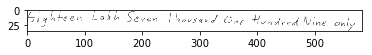

In [28]:
s_img = cv2.imread("in-words-ashu-transparentBG/Eighteen Lakh Seven Thousand One Hundred Nine only.png", -1)
kernel = np.ones((1,1), np.uint8)
s_img = cv2.dilate(s_img, kernel, iterations=1)
height, width = s_img.shape[:2]

s_img2 = cv2.resize(s_img, (int(width/1.5), int(height/1.5)), interpolation = cv2.INTER_AREA)

plt.imshow( s_img2)

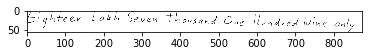

In [29]:
plt.imshow( s_img)

In [4]:
s_img=s_img2

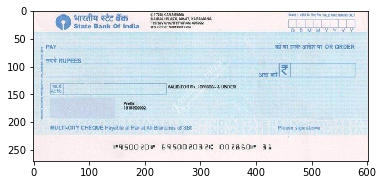

In [30]:
l_img = cv2.imread("cheque.jpg")
l_img = cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB)
plt.imshow( l_img)

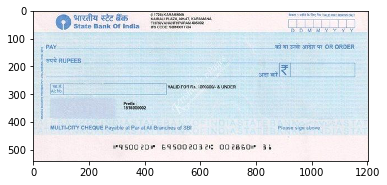

In [31]:

height2, width2 = l_img.shape[:2]
dst = cv2.resize(l_img, (2*width2, 2*height2), interpolation = cv2.INTER_CUBIC)
plt.imshow( dst)

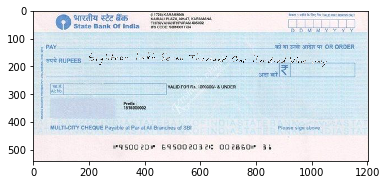

In [32]:



x_offset= 200 
y_offset=150
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s
dst2=dst
for c in range(0, 3):
    dst2[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * dst2[y1:y2, x1:x2, c])
    
plt.imshow( dst2)

## Adding number in box


(28, 141)


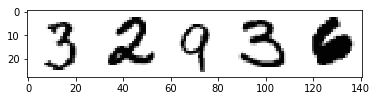

In [33]:
num_img = cv2.imread("Combined_transparent/number_0.png", cv2.IMREAD_GRAYSCALE)

height, width = num_img.shape[:2]
#num_img = cv2.resize(num_img, (int(width/2), int(height/2)), interpolation = cv2.INTER_AREA)
print(num_img.shape)
#num_img_show = cv2.cvtColor(num_img,cv2.IMREAD_GRAYSCALE)
plt.imshow( num_img ,cmap='gray')


True

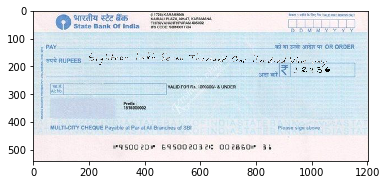

In [34]:
x_offset= 930 
y_offset=200
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + num_img.shape[0]
x1, x2 = x_offset, x_offset + num_img.shape[1]

alpha_s = num_img[:, :] / 255.0
alpha_l = 1.0 - alpha_s
dst3=dst2
for c in range(0, 3):
    dst3[y1:y2, x1:x2, c] = (alpha_l * num_img[:, :] +
                              alpha_s * dst3[y1:y2, x1:x2, c])
    



plt.imshow( dst3)
dst4 = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
cv2.imwrite("final-image.jpg", dst4)


# adding date

In [15]:
from PIL import Image
import os

folder_path_input = "dates_new/"
folder_path_output= "dates-transparentBG/"



image_names =os.listdir(folder_path_input)

for img_name in image_names:
    print (img_name)
    img = Image.open(folder_path_input+img_name)
    img = img.convert("LA")
    datas = img.getdata()
    break
    newData = []
    for item in datas:
        
        if item[0] == 255 :
            newData.append((255,  0))
        else:
            newData.append(item)
            
    #os.chdir(folder_path_output)
    img.putdata(newData)
    img.save(folder_path_output+img_name, "PNG")


date_722.png


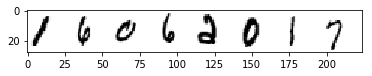

In [16]:
date_img = cv2.imread("dates_new/date_0.png",  cv2.IMREAD_GRAYSCALE)

height, width = date_img.shape[:2]
date_img = cv2.resize(date_img, (int(width/1.5), int(height/1)), interpolation = cv2.INTER_AREA)
plt.imshow( date_img ,cmap='gray')


True

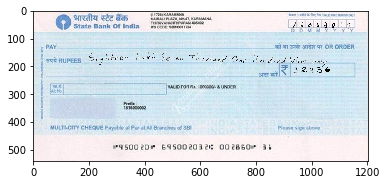

In [17]:
x_offset= 930 
y_offset=40
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + date_img.shape[0]
x1, x2 = x_offset, x_offset + date_img.shape[1]

alpha_s = date_img[:, :] / 255.0
alpha_l = 1.0 - alpha_s
dst4=dst3
for c in range(0, 3):
    dst4[y1:y2, x1:x2, c] = (alpha_l * date_img[:, :] +
                              alpha_s * dst3[y1:y2, x1:x2, c])
    



plt.imshow( dst4)
dst5 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
cv2.imwrite("final-image.jpg", dst5)

In [2]:
 import csv

In [ ]:
with open('details.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    for row in spamreader:
        if(header):
            header = False
            continue
        print( row)
        break

In [ ]:
with open('final-data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    with open('details.csv', 'r') as csvfile2:
        spamreader = csv.reader(csvfile2, delimiter=',')
        header = True
        for row in spamreader:
            if(header):
                header = False
                continue
            else:
                #print( row)
                try:
                    originalRow=row
                    blankCheques=["cheque-coffe.jpg" ,"cheque-faint.jpg" , "cheque-hue.jpg", "cheque-old.jpg", "cheque-original.jpg","cheque-photocopy.jpg","cheque-reflection.jpg"]
                    for chq in blankCheques:
                        row=originalRow
                        #print(chq)
                        l_img = cv2.imread("testChequeImages/"+chq)
                        #print(l_img)
                        l_img = cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB)
                        #plt.imshow( l_img)
                        #break
                        height2, width2 = l_img.shape[:2]

                        dst = cv2.resize(l_img, (2*width2, 2*height2), interpolation = cv2.INTER_CUBIC)

                        s_img = cv2.imread("in-words-ashu-transparentBG/" +row[4]+".png", -1)

                        height, width = s_img.shape[:2]

                        #s_img = cv2.dilate(s_img, kernel, iterations=50)
                        s_img2 = cv2.resize(s_img, (int(width/1.5), int(height/1.5)), interpolation = cv2.INTER_AREA)
                        kernel = np.ones((1,1), np.uint8)
                        s_img2 = cv2.dilate(s_img2, kernel, iterations=50)
                        #plt.imshow( s_img2)
                        x_offset= 200 
                        y_offset=150
                        #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                        #s_img = cv2.imread("smaller_image.png")

                        y1, y2 = y_offset, y_offset + s_img2.shape[0]
                        x1, x2 = x_offset, x_offset + s_img2.shape[1]

                        alpha_s = s_img2[:, :, 3] / 255.0
                        alpha_l = 1.0 - alpha_s
                        dst2=dst
                        for c in range(0, 3):
                            dst2[y1:y2, x1:x2, c] = (alpha_s * s_img2[:, :, c] +
                                                      alpha_l * dst[y1:y2, x1:x2, c])

                        row=row+["box1",x1,y1,x2,y2]
                        #print(x1,y1,x2,y2)
                        #plt.imshow( dst2)
                        ####################################

                        num_img = cv2.imread("Combined_transparent/" +row[6], cv2.IMREAD_GRAYSCALE)

                        height, width = num_img.shape[:2]
                        x_offset= 930 
                        y_offset=200
                        #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                        #s_img = cv2.imread("smaller_image.png")

                        y1, y2 = y_offset, y_offset + num_img.shape[0]
                        x1, x2 = x_offset, x_offset + num_img.shape[1]

                        alpha_s = num_img[:, :] / 255.0
                        alpha_l = 1.0 - alpha_s
                        dst3=dst2
                        for c in range(0, 3):
                            dst3[y1:y2, x1:x2, c] = (alpha_l * num_img[:, :] +
                                                      alpha_s * dst3[y1:y2, x1:x2, c])

                        row=row+["box2",x1,y1,x2,y2]
                        #print(x1,y1,x2,y2)
                        ####################################
                        date_img = cv2.imread("dates_new/" +row[8],  cv2.IMREAD_GRAYSCALE)

                        height, width = date_img.shape[:2]
                        date_img = cv2.resize(date_img, (int(width/1.5), int(height/1)), interpolation = cv2.INTER_AREA)
                        x_offset= 930 
                        y_offset=40
                        #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                        #s_img = cv2.imread("smaller_image.png")

                        y1, y2 = y_offset, y_offset + date_img.shape[0]
                        x1, x2 = x_offset, x_offset + date_img.shape[1]

                        alpha_s = date_img[:, :] / 255.0
                        alpha_l = 1.0 - alpha_s
                        dst4=dst3
                        for c in range(0, 3):
                            dst4[y1:y2, x1:x2, c] = (alpha_l * date_img[:, :] +
                                                      alpha_s * dst4[y1:y2, x1:x2, c])

                        row=row+["box3",x1,y1,x2,y2]
                        #print(x1,y1,x2,y2)
                        #plt.imshow( dst4)
                        dst5 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
                        name=chq.split(".")
                        #print(name)
                        cv2.imwrite("final-data/final-image-"+row[0]+"-"+name[0]+".jpg", dst5)
                        row=row+["final-data/final-image-"+row[0]+"-"+name[0]+".jpg"]
                        row=row+["final-image-"+row[0]+"-"+name[0]+".jpg"]
                        writer.writerow(row)
                    #break
                except :
                        print("issue occured")
                        pass
                #break

# Removing files having zero size

In [28]:
from PIL import Image
with open('final-data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    with open("final-data-filtered.csv", 'w') as csvfile2:
        writer = csv.writer(csvfile2, delimiter=',')
        for row in spamreader:
            
            try:
                im = Image.open(row[24])
                width, height = im.size
                #print(width, height)
                writer.writerow(row)
            except:
                print(row)
                break
                pass
        
            break

# Average width hight for YOLO darknet trainig and writing into final-data-txt/

In [36]:
from PIL import Image
with open('final-data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    
    im=Image.open("testChequeImages/cheque-coffe.jpg")
    w= int(im.size[0])
    h= int(im.size[1])
    dw = 1./w
    dh = 1./h
    for row in spamreader:
        """
        if(header):
            header = False
            print( row)
            continue
        else:
            print( row)
            break
        """
        
        #print( row)
        #print(len(row))
        #print( row[9])
        #print( row[14])
        #print( row[19])
        try:
            with open("final-data-txt/"+row[25].split(".")[0]+'.txt', 'w') as csvfile2:

                x = (int(row[10]) + int(row[12]))/2.0
                y = (int(row[11]) + int(row[13]))/2.0
                w = int(row[12] )- int(row[10])
                h = int(row[13]) - int(row[11])
                x = x*dw
                w = w*dw
                y = y*dh
                h = h*dh
                #print(x,y,w,h)
                writer = csv.writer(csvfile2, delimiter=' ')
                writeRow=[0]+[x,y,w,h]
                writer.writerow(writeRow)

                x = (int(row[10+5]) + int(row[12+5])-10)/2.0
                y = (int(row[11+5]) + int(row[13+5]))/2.0
                w = int(row[12+5] )- int(row[10+5])+10
                h = int(row[13+5]) - int(row[11+5])
                x = x*dw
                w = w*dw
                y = y*dh
                h = h*dh
                #print(x,y,w,h)
                writer = csv.writer(csvfile2, delimiter=' ')
                writeRow=[1]+[x,y,w,h]
                writer.writerow(writeRow)

                x = (int(row[10+5+5]) + int(row[12+5+5])-10)/2.0
                y = (int(row[11+5+5]) + int(row[13+5+5]))/2.0
                w = int(row[12+5+5] )- int(row[10+5+5])+10
                h = int(row[13+5+5]) - int(row[11+5+5])
                x = x*dw
                w = w*dw
                y = y*dh
                h = h*dh
                #print(x,y,w,h)
                writer = csv.writer(csvfile2, delimiter=' ')
                writeRow=[2]+[x,y,w,h]
                writer.writerow(writeRow)
            #break
        except:
            print( row)

['1075', '1075', 'b_']


# Building test and train data for YOLO darknet 

In [38]:
import glob, os

# Current directory
current_dir = os.path.dirname(os.path.abspath('final-data/final-image-0-cheque-original.jpg'))
print(current_dir)
# Directory where the data will reside, relative to 'darknet.exe'
path_data = 'final-data/'

# Percentage of images to be used for the test set
percentage_test = 10;

# Create and/or truncate train.txt and test.txt
file_train = open('train.txt', 'w')  
file_test = open('test.txt', 'w')

# Populate train.txt and test.txt
counter = 1  
index_test = round(100 / percentage_test)  
#for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
#    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    
with open('final-data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    #removing 0 size images from test and train
    for row in spamreader:
        try:
            im = Image.open(pathAndFilename)
            width, height = im.size

            #print(width, height)
            #writer.writerow(row)
            if counter == index_test:
                counter = 1
                file_test.write(row[24] + "\n")
            else:
                file_train.write(row[24] + "\n")
                counter = counter + 1
        except:
            #removing 0 size images from test and train
            #print(pathAndFilename)
            #break
            pass
    

/home/ashutosh/sentienceWork/magnet/final-data


# YOLO darknet image test results

##  TEST images out of 10000 images

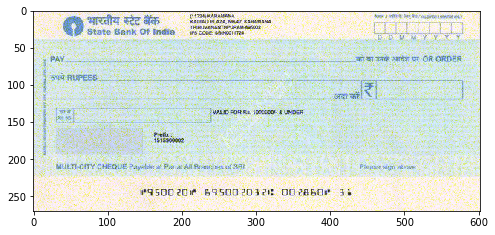

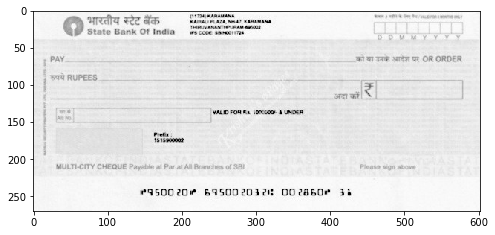

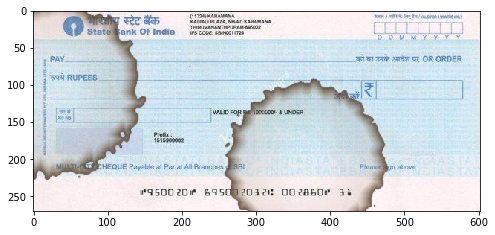

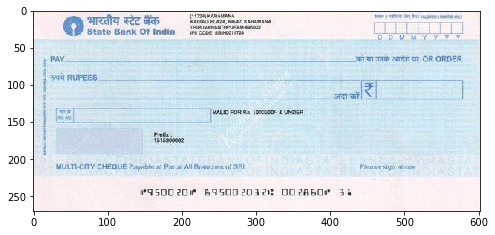

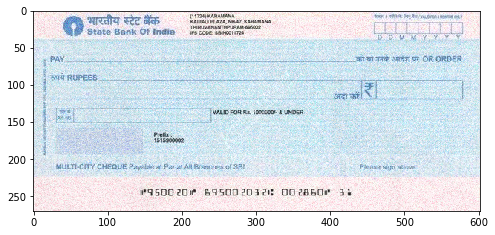

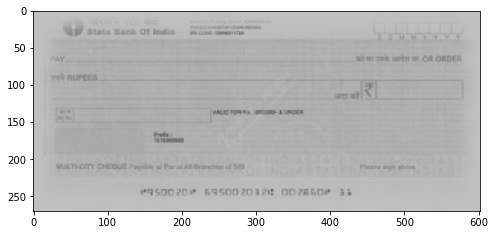

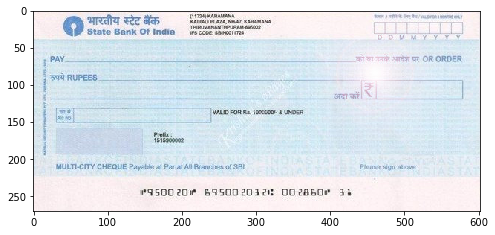

In [22]:
import glob
images = glob.glob('testChequeImages/*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    f, (ax1)= plt.subplots(1,1, figsize=(8,4))
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
       
     

# train images 10

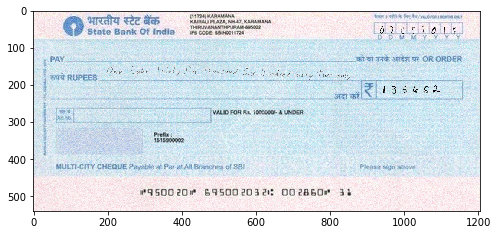

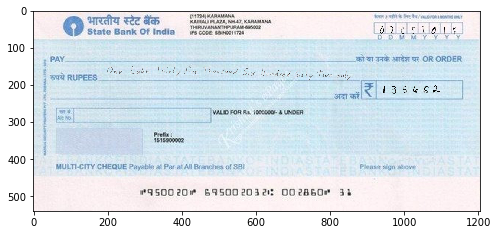

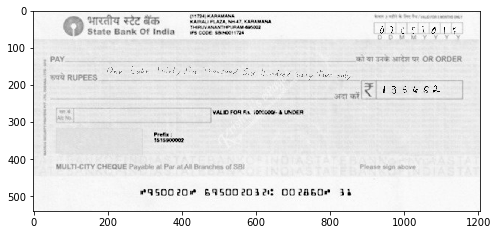

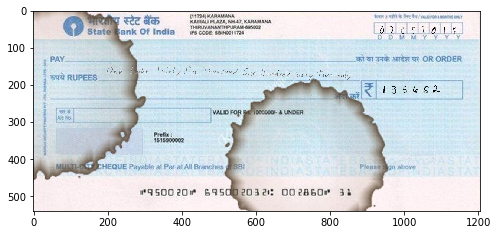

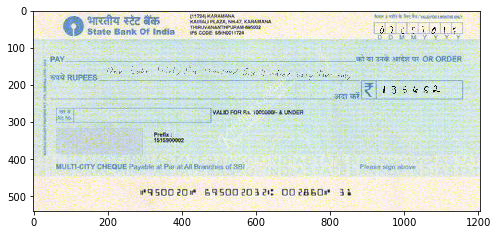

In [33]:
images = glob.glob('final-data/final-image-*0*.jpg')

a="final-data/final-image-1-cheque-hue.jpg"
b="final-data/final-image-1-cheque-original.jpg"
c="final-data/final-image-1-cheque-photocopy.jpg"
d="final-data/final-image-1-cheque-coffe.jpg"
e="final-data/final-image-1-cheque-faint.jpg"


img = cv2.imread(a)
f, (ax1)= plt.subplots(1,1, figsize=(8,4))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


img = cv2.imread(b)
f, (ax1)= plt.subplots(1,1, figsize=(8,4))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

img = cv2.imread(c)
f, (ax1)= plt.subplots(1,1, figsize=(8,4))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

img = cv2.imread(d)
f, (ax1)= plt.subplots(1,1, figsize=(8,4))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

img = cv2.imread(e)
f, (ax1)= plt.subplots(1,1, figsize=(8,4))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    
    

# YOLO prediction using Reginal consvolution neural network

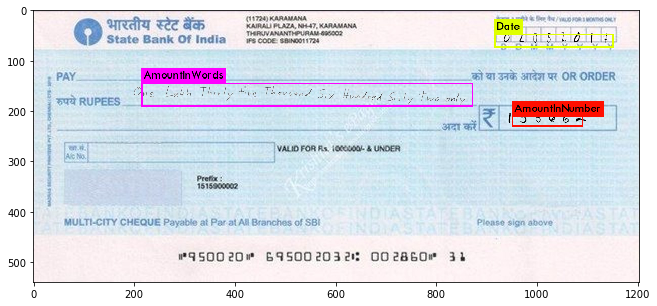

In [36]:
img = cv2.imread("predictions2.png")
f, (ax1)= plt.subplots(1,1, figsize=(200,5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


# image traversal for segmentation


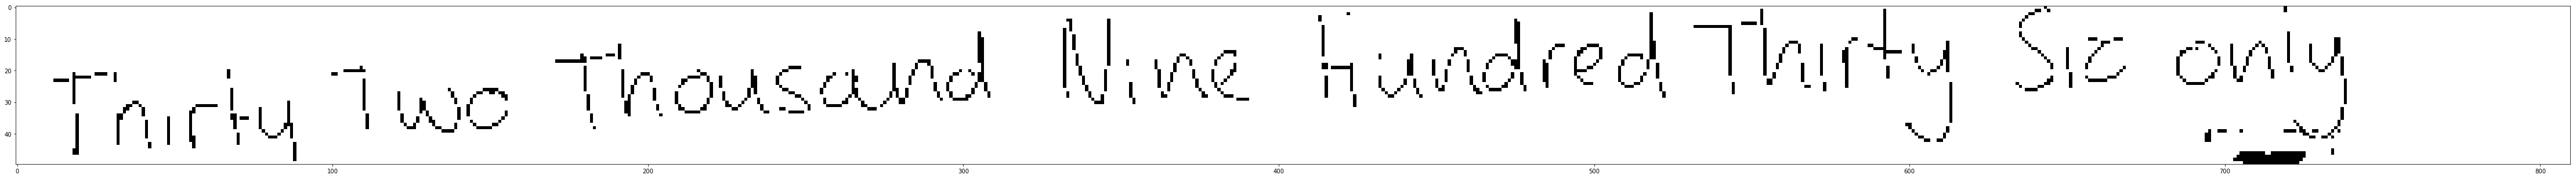

In [2]:
img = cv2.imread("words_img_cheque.png")
f, (ax1)= plt.subplots(1,1, figsize=(200,5))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
img.shape

(50, 810, 3)

 pip install imutils

In [3]:
import pip  
pip.main(['install', 'imutils'])

  Using cached imutils-0.4.3.tar.gz
  Running setup.py bdist_wheel for imutils: started
  Running setup.py bdist_wheel for imutils: finished with status 'done'
  Stored in directory: /home/ashutosh/.cache/pip/wheels/4b/5c/b9/5fb892e82d1f10678bd1a3f2555b6a9777e238b7a852e6df27
Successfully built imutils


0

In [4]:
import imutils
 
def pyramid(image, scale=1.5, minSize=(30, 30)):
	# yield the original image
	yield image
 
	# keep looping over the pyramid
	while True:
		# compute the new dimensions of the image and resize it
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
 
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
 
		# yield the next image in the pyramid
		yield image

In [8]:
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [1]:
(winW, winH) = (50, 810)
image=img
# loop over the image pyramid
for resized in pyramid(image, scale=1.5):
	# loop over the sliding window for each layer of the pyramid
	for (x, y, window) in sliding_window(resized, stepSize=5, windowSize=(winW, winH)):
		# if the window does not meet our desired window size, ignore it
		#if window.shape[0] != winH or window.shape[1] != winW:
			#continue
 
		# THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
		# MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
		# WINDOW
 
		# since we do not have a classifier, we'll just draw the window
		clone = resized.copy()
		cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
		cv2.imshow("Window", clone)
		cv2.waitKey(1)
		f, (ax1)= plt.subplots(1,1, figsize=(200,5))
		ax1.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
		#time.sleep(0.025)

NameError: name 'img' is not defined